In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers

from ImageProcessing import *
from ImageGenerator import ImageGenerator

# Creating Parameters For Image Generation

In [5]:
width, height = 16, 16
a0, a1 = np.array([5.7, 0]), np.array([0, 5.7])
lattice_offset = np.array([2, 2])
lattice_shape = np.array([3, 3])
noise_mean = 100
noise_spread = 0.2
n_bright = 10
n_dark = 1
site_spread = 1.1

im_gen = ImageGenerator(width, height, a0, a1, lattice_offset, lattice_shape, noise_mean,
                         noise_spread, n_dark, n_bright, site_spread)

In [6]:
images, labels = im_gen.make(10)


KeyboardInterrupt: 

In [4]:
processor = BlueImageProcessor(images, np.array([3, 3]), labels)
images, labels = processor.crop_images()

[(5120, 0, 0), (5120, 0, 18), (5120, 0, 18), (5120, 18, 0), (5120, 18, 18), (5120, 18, 18), (5120, 18, 0), (5120, 18, 18), (5120, 18, 18)]


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 0 and the array at index 1 has size 18

# Check to see that images look correct

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 0.]]


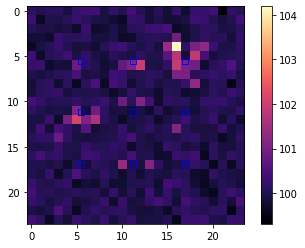

In [ ]:
random_index = np.random.randint(images.shape[0])

print(labels[random_index].reshape(lattice_shape))

processor.plot(random_index)

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((images, labels))

In [ ]:
model = models.Sequential()
model.add(layers.Input(shape=(100, 15, 1)))
model.add(layers.Conv2D(16, (3, 3), strides=1, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(16, (6, 6), strides=1, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(15, activation='sigmoid'))

model.summary()

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
model.fit(images, labels, epochs=10)